In [1]:
import pandas as pd

In [4]:
import geopandas as gpd

In [6]:
data=gpd.read_file("R_codes/R/plots/regression.shp")

In [8]:
data.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,DWGVI,Scenic_GVI,Constant_G,Original_G,avg_ndvi,avg_temp,area,All_Ages,popdens,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465.0,1465.0,...,1.081559,2.744604,3.452382,6.797078,0.147762,38.389786,133325.863381,1749.0,0.013118,"POLYGON ((532106.881 182011.473, 532164.280 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436.0,1436.0,...,0.240196,0.964048,1.187622,2.409668,0.156848,37.449299,226199.315385,1678.0,0.007418,"POLYGON ((532748.611 181787.122, 532673.482 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346.0,1250.0,...,0.094253,0.345481,0.458781,0.834147,0.197733,38.341492,57305.121097,1900.0,0.033156,"POLYGON ((532136.937 182198.366, 532160.042 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985.0,985.0,...,0.854578,3.117605,3.993774,7.656860,0.138421,38.593716,190745.069152,2181.0,0.011434,"POLYGON ((533809.752 180767.966, 533650.865 18..."
4,E01000842,Camden 011A,E02000176,Camden 011,E09000007,Camden,E12000007,London,1444.0,1368.0,...,1.784359,4.367032,5.634705,10.689697,0.337357,40.609043,103702.393534,1868.0,0.018013,"POLYGON ((527319.593 184750.881, 527358.827 18..."


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\win10\.conda\envs\yyjj125\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
selected_data = data[[ 'Original_G','Constant_G','Scenic_GVI','DWGVI']]

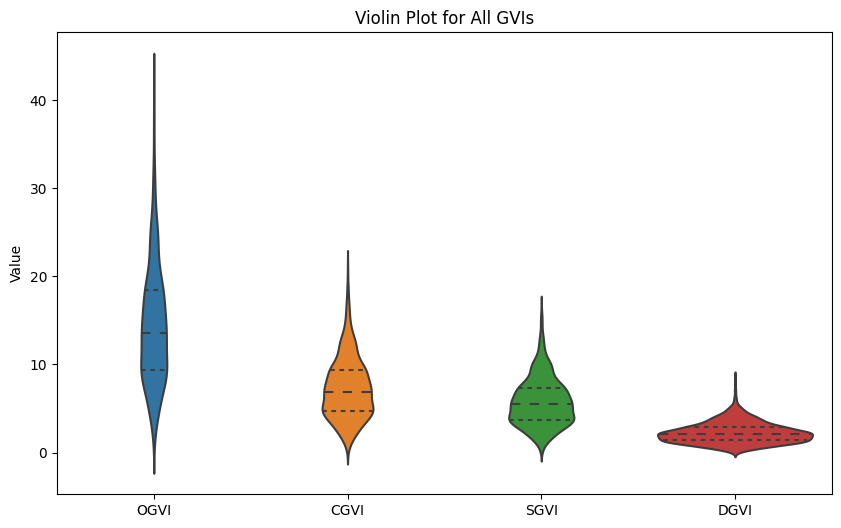

In [21]:
melted_data = selected_data.melt(var_name='Variable', value_name='Value')
plt.figure(figsize=(10, 6))
sns_violin = sns.violinplot(x='Variable', y='Value', data=melted_data, inner="quartile")

new_labels = ['OGVI', 'CGVI' ,'SGVI','DGVI']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

sns_violin.set_xlabel('')

plt.title('Violin Plot for All GVIs')
plt.show()

In [22]:
data.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'DWGVI', 'Scenic_GVI', 'Constant_G',
       'Original_G', 'avg_ndvi', 'avg_temp', 'area', 'All_Ages', 'popdens',
       'geometry'],
      dtype='object')

In [28]:
variables = data[[ 'Original_G','Constant_G','Scenic_GVI','DWGVI','avg_ndvi','popdens','avg_temp']]

In [29]:
new_column_names = {
    'Original_G': 'OGVI',
    'Constant_G': 'CGVI',
    'Scenic_GVI': 'SGVI',
    'DWGVI': 'DGVI',
    'avg_ndvi': 'SNDVI',
    'popdens': 'POPDENS',
    'avg_temp': 'SLST'
}

variables = variables.rename(columns=new_column_names)

In [42]:
correlation_matrix = variables.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'OGVI'),
  Text(0, 1.5, 'CGVI'),
  Text(0, 2.5, 'SGVI'),
  Text(0, 3.5, 'DGVI'),
  Text(0, 4.5, 'SNDVI'),
  Text(0, 5.5, 'POPDENS'),
  Text(0, 6.5, 'SLST')])

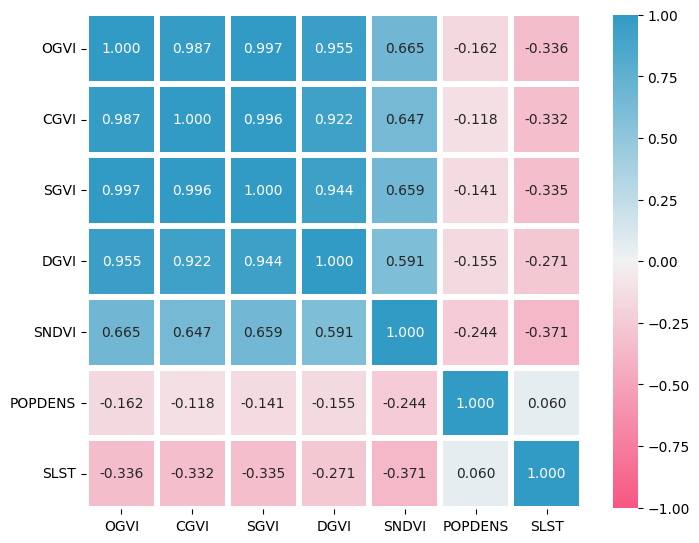

In [43]:
formatted_data = correlation_matrix.applymap(lambda x: '{:.3f}'.format(x))

plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(round3, vmax=1, cmap=cmap, vmin=-1, center=0, annot=formatted_data,
            square=True, linewidths=3, cbar_kws={"shrink": .8}, fmt="")

plt.yticks(rotation=0)

In [46]:
describe=variables.describe()

In [47]:
describe.to_csv("describe_summary.csv")